<a href="https://colab.research.google.com/github/siriusbluecarter/PRODIGY_ML_01/blob/main/housing_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

House price prediction


In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# supress warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/content/realest.csv")

In [3]:
df.tail()

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
152,44.0,3.0,820.0,5.0,27.0,NaN,1.0,0.0,1.0
153,43.0,2.0,593.0,4.0,30.0,465.0,2.0,1.0,0.0
154,53.0,3.0,716.0,6.0,30.0,585.0,1.0,2.0,1.0
155,62.0,4.0,951.0,7.0,30.0,895.0,2.0,1.0,0.0
156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(157, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Price      156 non-null    float64
 1   Bedroom    156 non-null    float64
 2   Space      146 non-null    float64
 3   Room       156 non-null    float64
 4   Lot        146 non-null    float64
 5   Tax        147 non-null    float64
 6   Bathroom   156 non-null    float64
 7   Garage     156 non-null    float64
 8   Condition  156 non-null    float64
dtypes: float64(9)
memory usage: 11.2 KB


In [6]:
df.describe(include='all')

,Price,Bedroom,Space,Room,Lot,Tax,Bathroom,Garage,Condition
count,156.000000,156.000000,146.000000,156.000000,146.000000,147.000000,156.000000,156.000000,156.000000
mean,56.474359,3.166667,1097.246575,6.500000,32.808219,911.707483,1.480769,0.846154,0.230769
std,12.875307,1.348037,462.540698,1.675247,8.457859,443.263430,0.529408,0.808454,0.422682
min,32.000000,1.000000,539.000000,4.000000,24.000000,418.000000,1.000000,0.000000,0.000000
25%,46.000000,2.000000,805.250000,5.000000,25.000000,652.500000,1.000000,0.000000,0.000000
50%,55.000000,3.000000,965.500000,6.000000,30.000000,821.000000,1.500000,1.000000,0.000000
75%,65.000000,4.000000,1220.500000,7.000000,37.000000,1012.500000,2.000000,1.500000,0.000000
max,90.000000,8.000000,2295.000000,12.000000,50.000000,2752.000000,3.000000,2.000000,1.000000


In [7]:
pd.isnull(df).sum()

Price         1
Bedroom       1
Space        11
Room          1
Lot          11
Tax          10
Bathroom      1
Garage        1
Condition     1
dtype: int64

In [8]:
df=df.iloc[0:156,0:9]
print(df)

     Price  Bedroom   Space  Room   Lot     Tax  Bathroom  Garage  Condition
0     53.0      2.0   967.0   5.0  39.0   652.0       1.5     0.0        0.0
1     55.0      2.0   815.0   5.0  33.0  1000.0       1.0     2.0        1.0
2     56.0      3.0   900.0   5.0  35.0   897.0       1.5     1.0        0.0
3     58.0      3.0  1007.0   6.0  24.0   964.0       1.5     2.0        0.0
4     64.0      3.0  1100.0   7.0  50.0  1099.0       1.5     1.5        0.0
..     ...      ...     ...   ...   ...     ...       ...     ...        ...
151   42.0      3.0   585.0   5.0  50.0   713.0       1.0     0.0        0.0
152   44.0      3.0   820.0   5.0  27.0     NaN       1.0     0.0        1.0
153   43.0      2.0   593.0   4.0  30.0   465.0       2.0     1.0        0.0
154   53.0      3.0   716.0   6.0  30.0   585.0       1.0     2.0        1.0
155   62.0      4.0   951.0   7.0  30.0   895.0       2.0     1.0        0.0

[156 rows x 9 columns]


In [9]:
from sklearn.impute import SimpleImputer
import numpy as np

# Assuming 'df' is your DataFrame containing the dataset
SIN = SimpleImputer(missing_values=np.nan, strategy='mean')
df.iloc[0:156, 0:9] = SIN.fit_transform(df.iloc[0:156, 0:9])

# Display the updated DataFrame
print(df)


     Price  Bedroom   Space  Room   Lot          Tax  Bathroom  Garage  \
0     53.0      2.0   967.0   5.0  39.0   652.000000       1.5     0.0   
1     55.0      2.0   815.0   5.0  33.0  1000.000000       1.0     2.0   
2     56.0      3.0   900.0   5.0  35.0   897.000000       1.5     1.0   
3     58.0      3.0  1007.0   6.0  24.0   964.000000       1.5     2.0   
4     64.0      3.0  1100.0   7.0  50.0  1099.000000       1.5     1.5   
..     ...      ...     ...   ...   ...          ...       ...     ...   
151   42.0      3.0   585.0   5.0  50.0   713.000000       1.0     0.0   
152   44.0      3.0   820.0   5.0  27.0   911.707483       1.0     0.0   
153   43.0      2.0   593.0   4.0  30.0   465.000000       2.0     1.0   
154   53.0      3.0   716.0   6.0  30.0   585.000000       1.0     2.0   
155   62.0      4.0   951.0   7.0  30.0   895.000000       2.0     1.0   

     Condition  
0          0.0  
1          1.0  
2          0.0  
3          0.0  
4          0.0  
..       

In [10]:
# droping null values
pd.isnull(df).sum()

Price        0
Bedroom      0
Space        0
Room         0
Lot          0
Tax          0
Bathroom     0
Garage       0
Condition    0
dtype: int64

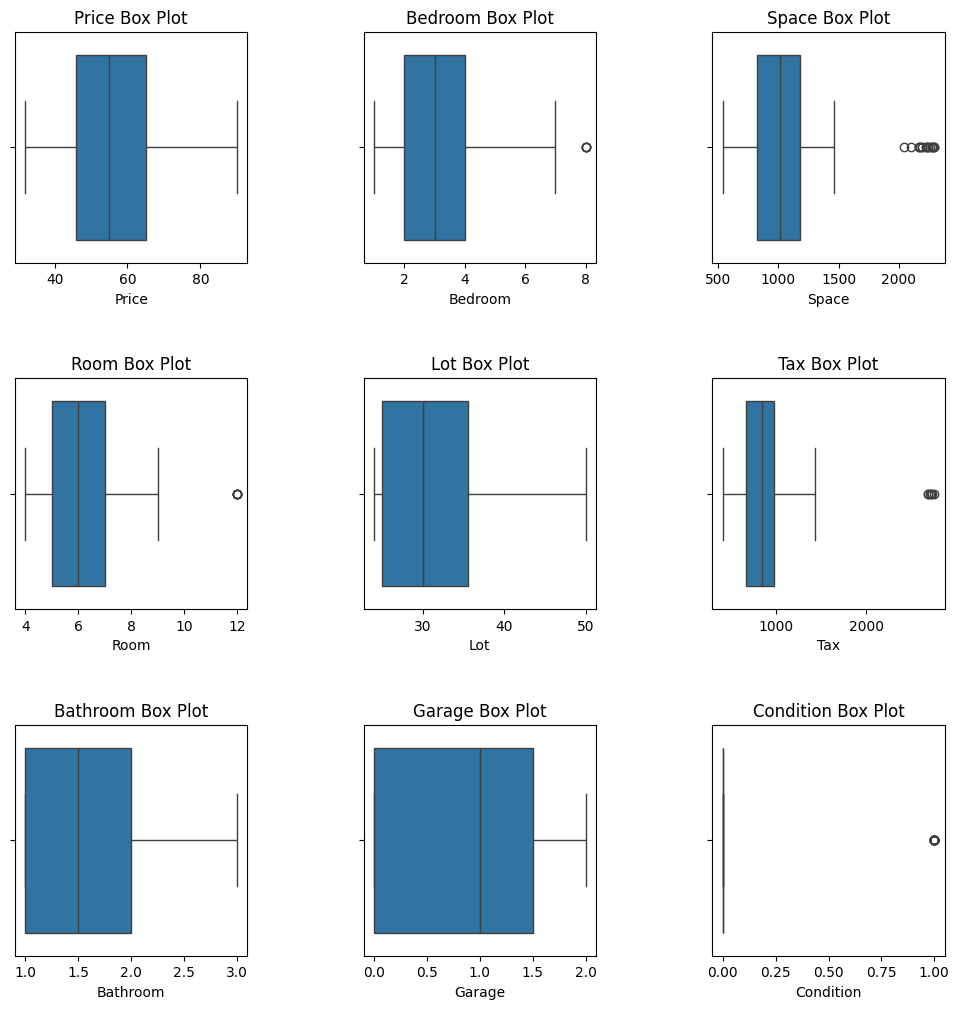

In [11]:
#boxplot
fig, axes = plt.subplots(3, 3, figsize=(12,12))

for i in range(3):
    for j in range(3):
        col = df.columns[i * 3 + j]
        sns.boxplot(data=df, x=col, ax=axes[i, j])
        axes[i, j].set_title(col + " Box Plot")

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()


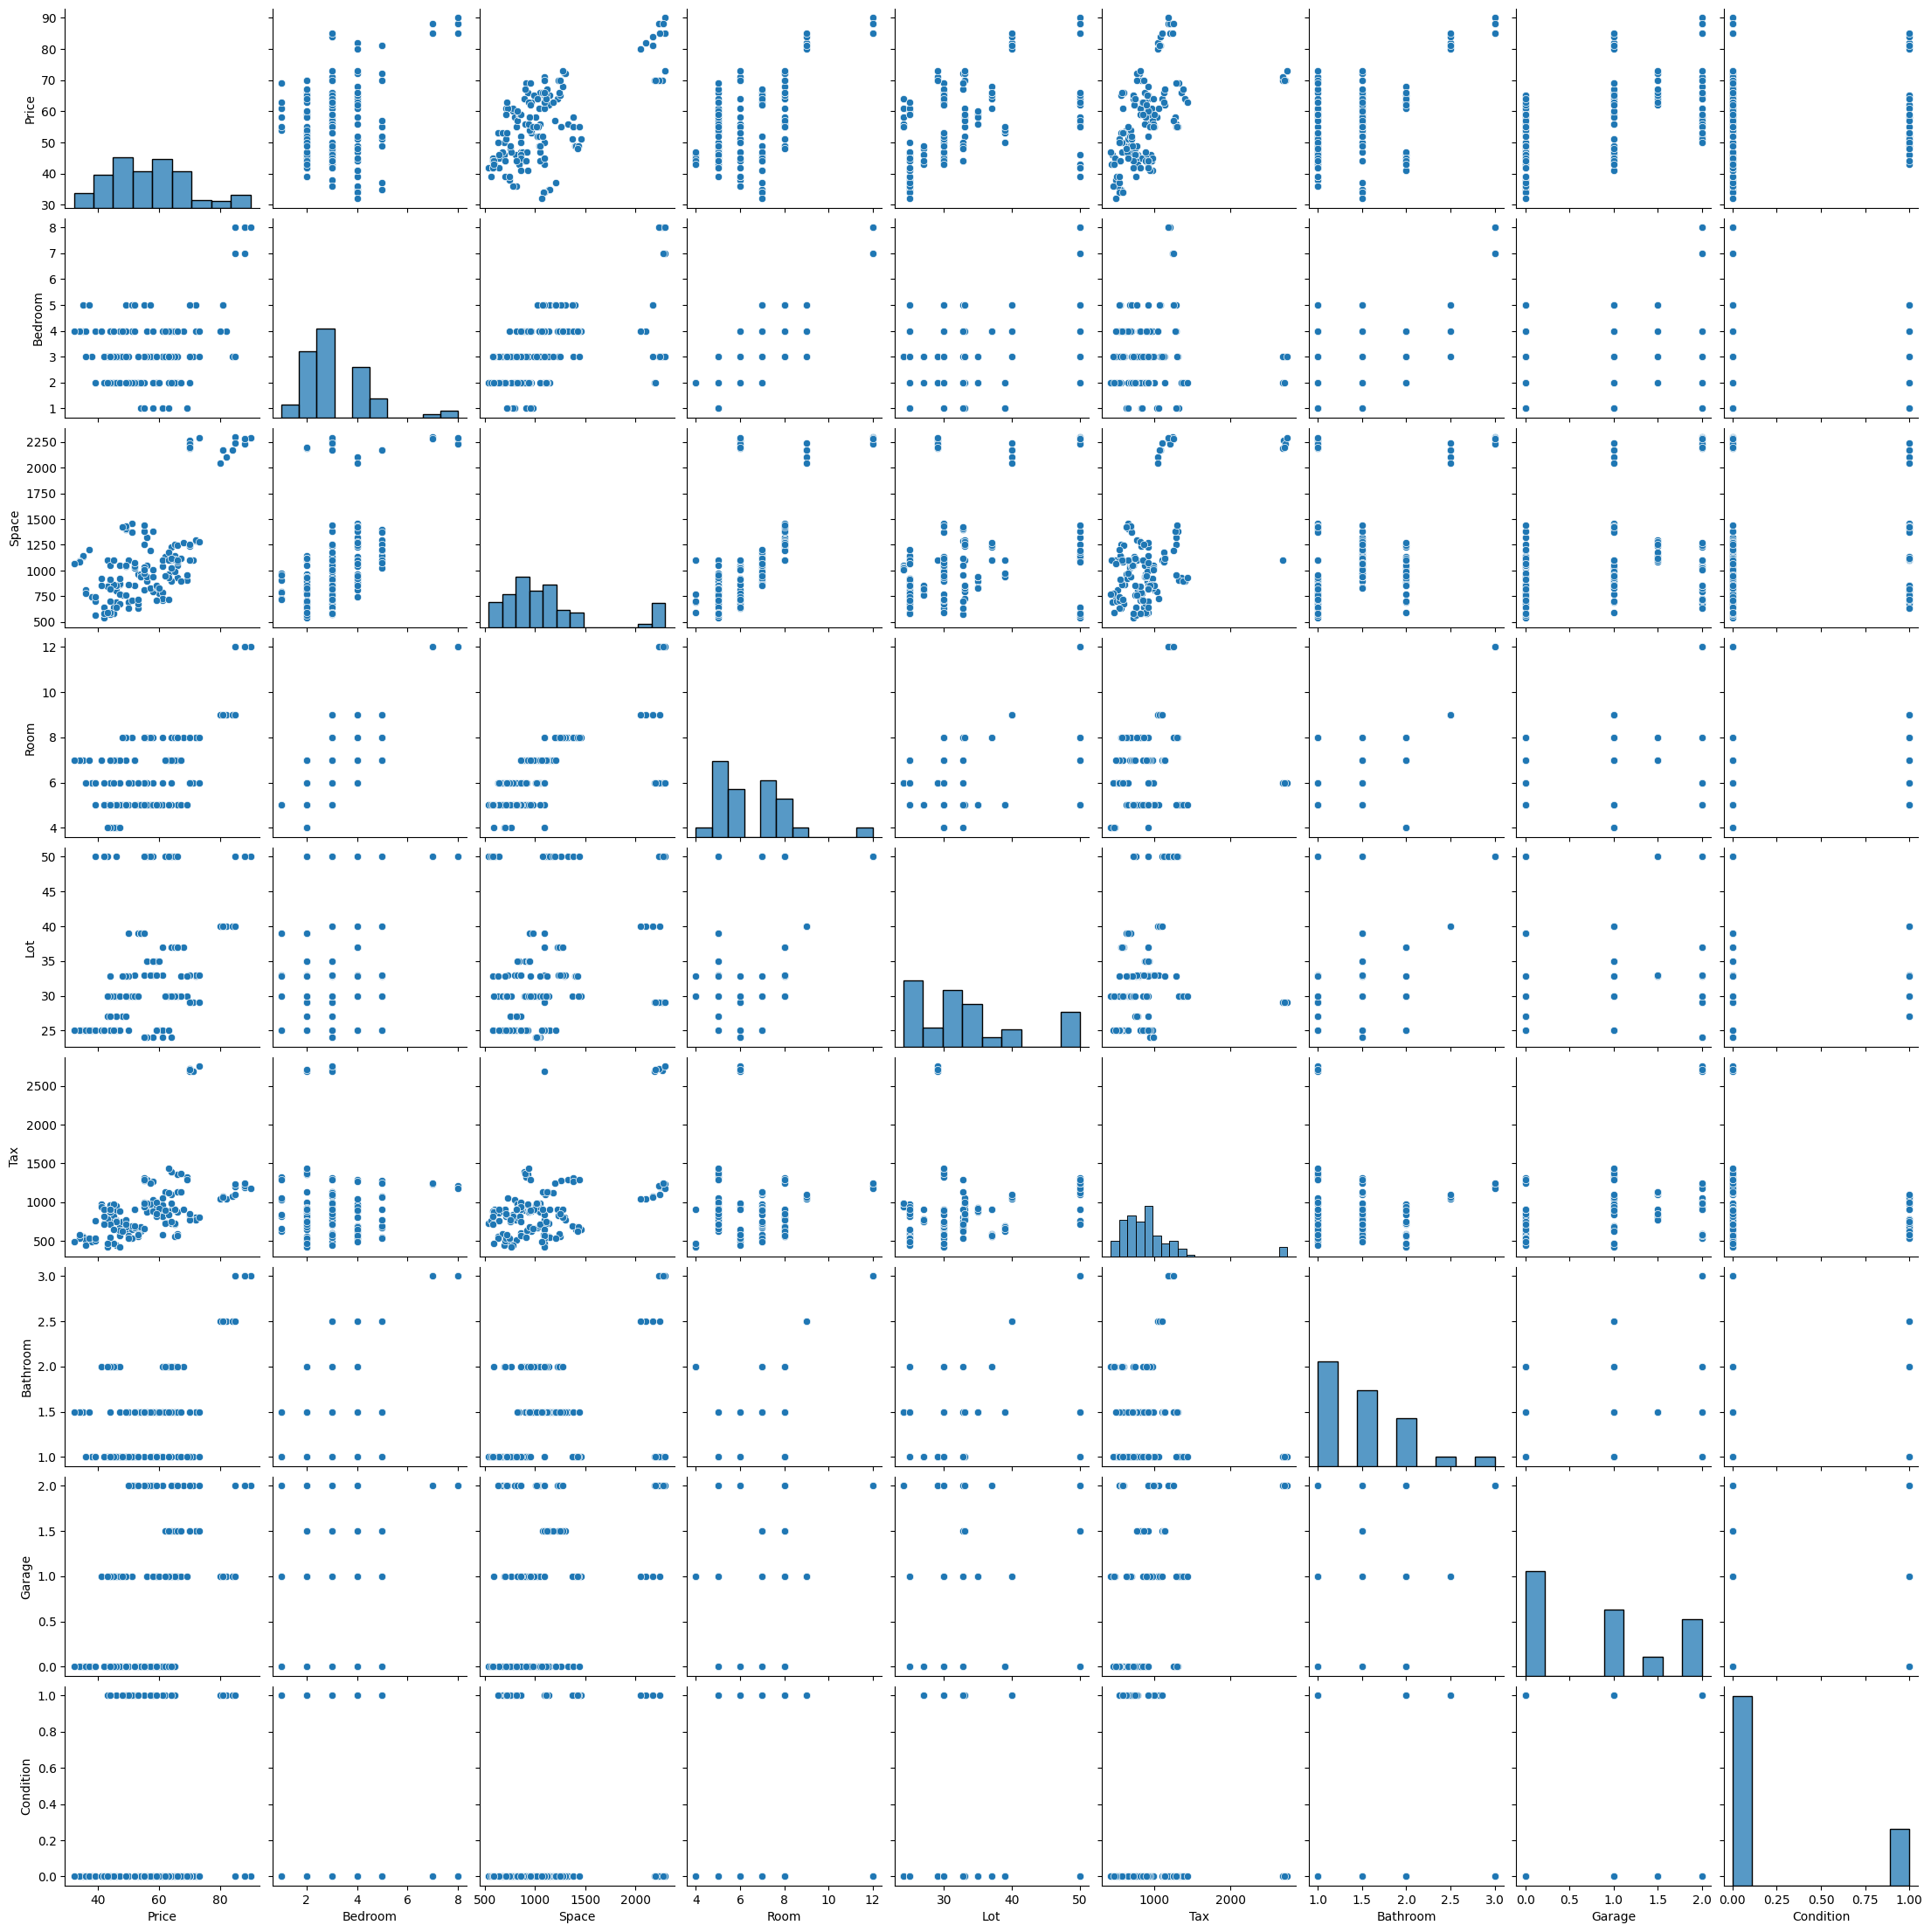

In [12]:
sns.pairplot(df)

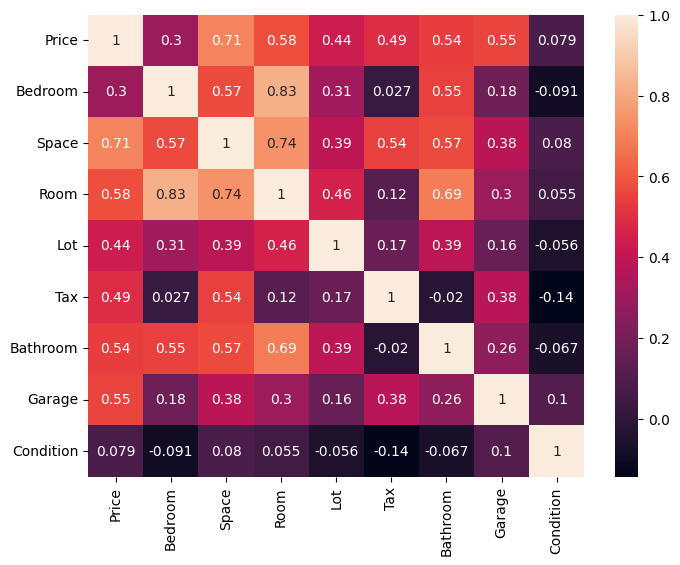

In [13]:
#heatmap
corr = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x=df.iloc[:,1:]
y=df.iloc[:,0]
# Perform the train-test split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=1)
LinearRegression().fit(x_train,y_train)

LinearRegression()

In [15]:
print(f"shape of X_train {x_train.shape}")
print(f"shape of y_train {y_train.shape}")
print(f"shape of X_test {x_test.shape}")
print(f"shape of y_test {y_test.shape}")

shape of X_train (124, 8)
shape of y_train (124,)
shape of X_test (32, 8)
shape of y_test (32,)


In [16]:
y_pred=LinearRegression().fit(x_train,y_train).predict(x_test)
y_pred


array([53.99617026, 51.06546069, 62.35622341, 61.79340514, 73.40660667,
       58.68666315, 62.53213267, 62.00075268, 52.3129455 , 62.05866539,
       49.98967983, 50.62908067, 62.54001213, 44.15535538, 46.12172946,
       58.48799554, 45.13646944, 58.44873964, 48.72749784, 58.60658216,
       67.28695841, 48.66943892, 42.07872133, 44.57246703, 46.09636032,
       65.09545646, 58.39277759, 61.81796459, 55.84877346, 55.41520721,
       59.81547228, 65.09873687])

In [17]:

LinearRegression().fit(x_train,y_train).score(x_train,y_train)

0.735876351968454

In [18]:
# Calculate R-squared score
from sklearn.metrics import r2_score
r_squared=r2_score(y_test,y_pred)
print("R-squared:", r_squared)

R-squared: 0.4749247770942019


In [19]:
#calculating the MSE
from sklearn.metrics import  mean_squared_error

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 57.257812197805706


In [20]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the Gradient Boosting Regressor model
gb_regressor = GradientBoostingRegressor()
gb_regressor.fit(x_train, y_train)

# Make predictions on the test set
y_pred = gb_regressor.predict(x_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)

# Evaluate model performance on training data
train_score = gb_regressor.score(x_train, y_train)
print("Training Score:", train_score)


Mean Squared Error: 12.960385508906239
R-squared: 0.8811484922524718
Training Score: 0.9915568960072867


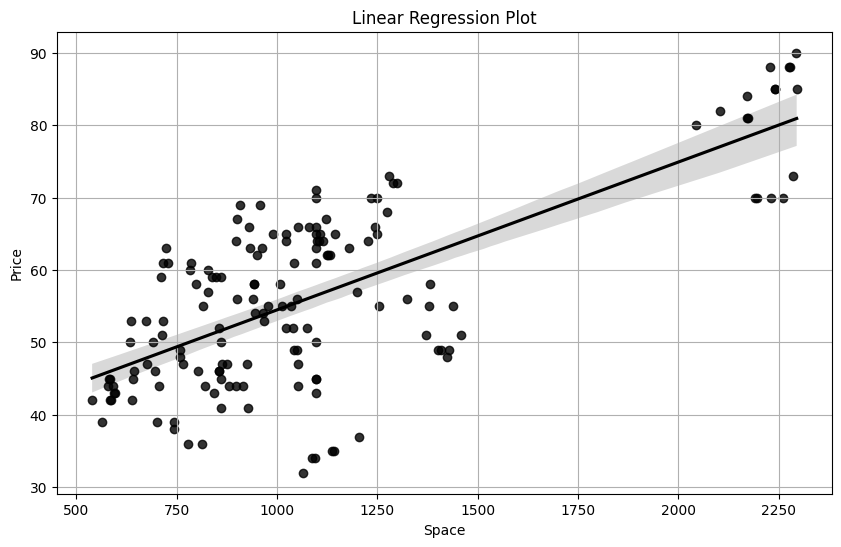

In [21]:
#visiualisation
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.regplot(x='Space', y='Price',color='Black', data=df)
plt.title('Linear Regression Plot')
plt.xlabel('Space')
plt.ylabel('Price')
plt.grid(True)
plt.show()
